## 주성분분석(PCA, Principal Component Analysis):차원축소 모델

In [1]:
# - 주성분(주요 구성요소, 특성)분석, PCA라고도 부릅니다.
# - 대표적인 차원축소 모델
# - 지도/비지도 모두 사용가능합니다.
# - 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 될 가능성은 커짐
# - 이때 차원축소를 이용하면 성능을 유지하면서, 속도를 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성을 선택
# - 데이터 크기(특성)을 줄이면서 학습모델의 성능을 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함

### <장점>
# - 대량의 데이터를 이용하여 모델 훈련 시에
# - 시간이 오래 걸리는 경우 적용해 볼 수 있음
# - 훈련시간 개선 및 성능 유지 또는 향상 가능

# - 현장에서 차원축소 쓰는경우 많다
# - 많은양의 이미지를 처리할때 걸리는것은 속도이다
# - 대용량데이터를 처리할때, 5000만건~ 필요하다
# - 동영상을 불러와서 이미지 캡처를해서 사용하기도 한다
# - PC성능을 효율적으로 사용 할 수 있다 따라서 현장에서 선호하는 모델 중의 하나이다

## PCA 클래스(모델)

In [4]:
import numpy as np
import pandas as pd

fruits = np.load("../data/09_fruits_300.npy")
print(fruits.shape)

# 첫번째 축 : 300개 행
# 두번째 축 : 열이 100개
# 세번째 축 : 깊이 100개 (실제데이터가 들어있는 곳)


## 300 goddp 10000열로 변환
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

## 데이터프레임으로
df = pd.DataFrame(fruits_2d)
df

(300, 100, 100)
(300, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스(모델) 생성하기
# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정해 주어야 합니다.
pca = PCA(n_components = 50)

# 훈련모델 생성하기
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [7]:
import matplotlib.pyplot as plt

### 3개 클러스터를 각각 테스트하기 위하여 이미지 출력 함수 생성

def draw_fruits(arr, ratio = 1) :
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols * ratio, rows*ratio),
                            squeeze = False)
    
    for i in range(rows) :
        for j in range(cols):
            if i*10+j < n:
                axs[i , j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
            
    plt.show()

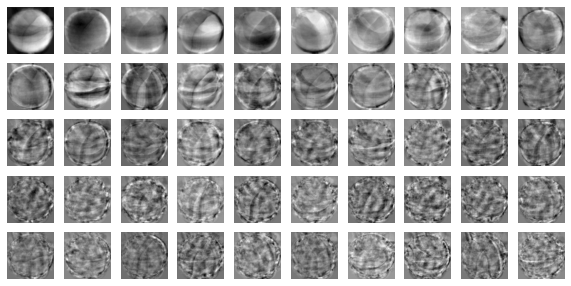

In [9]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [11]:
print(fruits_2d.shape)

(300, 10000)


## 차원축소하기

In [12]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [17]:
# 2d -> 3d로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


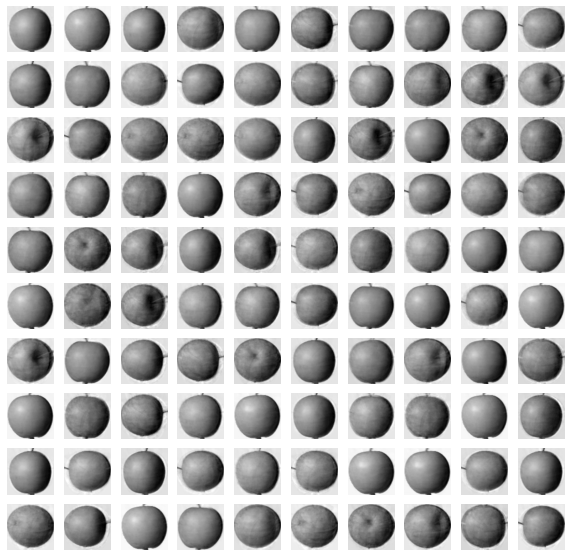

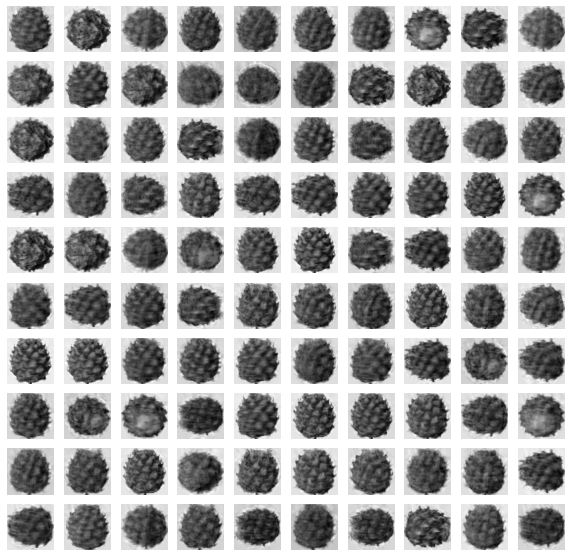

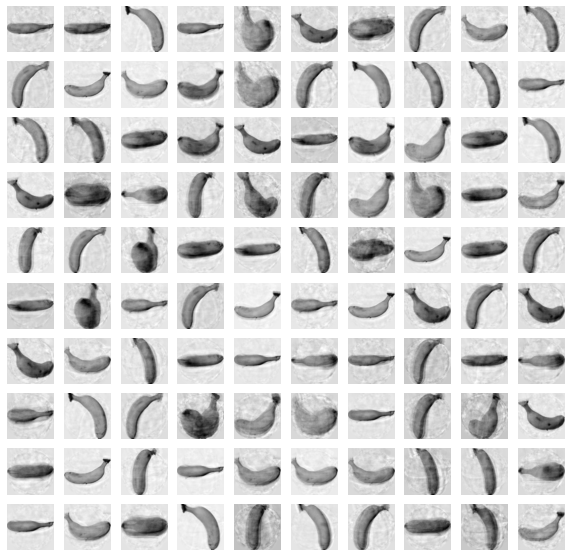

In [18]:
# 선명도는 떨어지지만 잘 보임
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start : start + 100])

## KMeans 모델에 차원축소 데이터 적용하기

In [20]:
from sklearn.cluster import KMeans

# n_clusters : 클러스터 갯수
km = KMeans(n_clusters = 3, random_state = 42)

# 훈련모델 생성하기
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [21]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


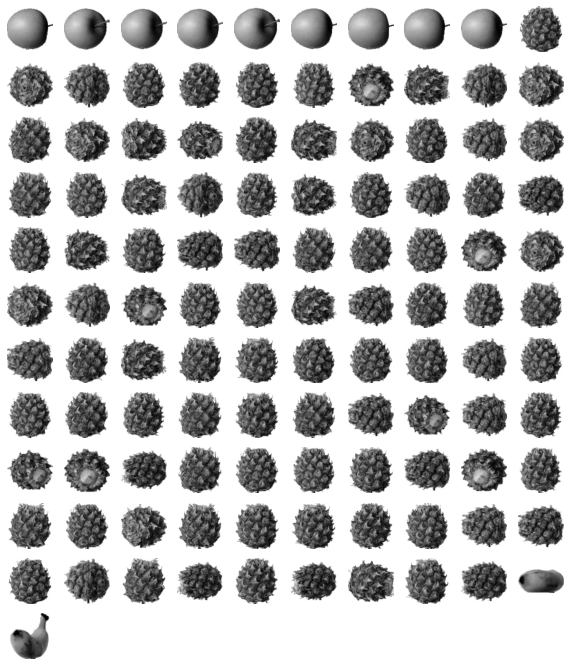

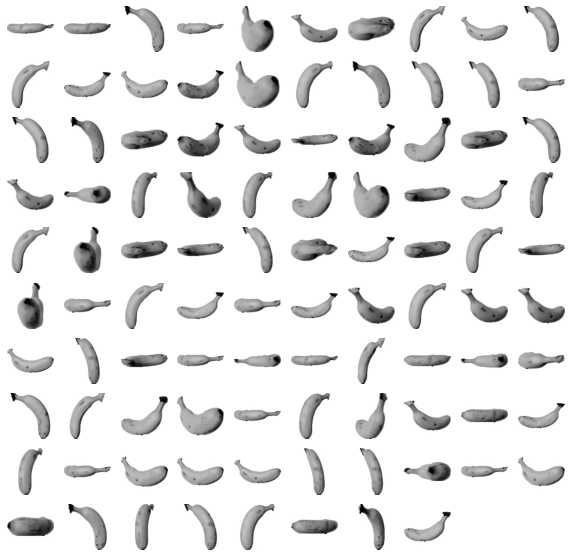

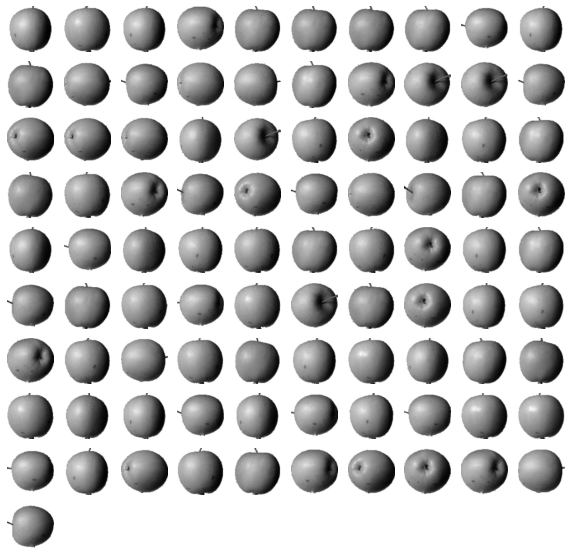

In [28]:
for label in range(0, 3) :
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

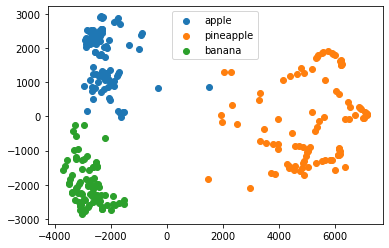

In [30]:
## 클러스터 구성 확인 --> 산점도로 시각화하여 확인
for label in range(0, 3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:,1])

plt.legend(['apple','pineapple','banana'])
plt.show()

In [31]:
## 플랫폼있는 회사를 가면 대용량데이터, 실시간데이터 많이 다룬다
## 실시간데이터 시간차이를 줄이는 방법이 주성분분석을 통한 차원축소

## 로지스틱 회귀모델 적용해 보기

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

### 종속변수(target) 생성하기
# 지도학습을 사용하는 경우 target 변수가 필요합니다.
target = [0]*100 + [1] * 100 + [2]*100

In [43]:
df= pd.DataFrame(fruits_2d)
df['target'] = target
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,2
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [47]:
### 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6648154735565186


In [48]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [49]:
print(pca.n_components_)

2


In [50]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [51]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.0501441478729248


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [52]:
## 회사면접볼때 나오는 예시 속도 => 주성분분석을 통한 차원축소라는 이야기를 하자 !